Run Guidelines
-----
Anyone can run the sweep.py python file using following command from terminal:<br>
<b>python sweep.py</b><br>
Following are output of two combined run

output parallel coordinate
-----
output:<br>
https://wandb.ai/kankan-jana/cs6910_assignment1/reports/Shared-panel-22-02-20-02-02-23--VmlldzoxNTg0MDE5?highlightShare
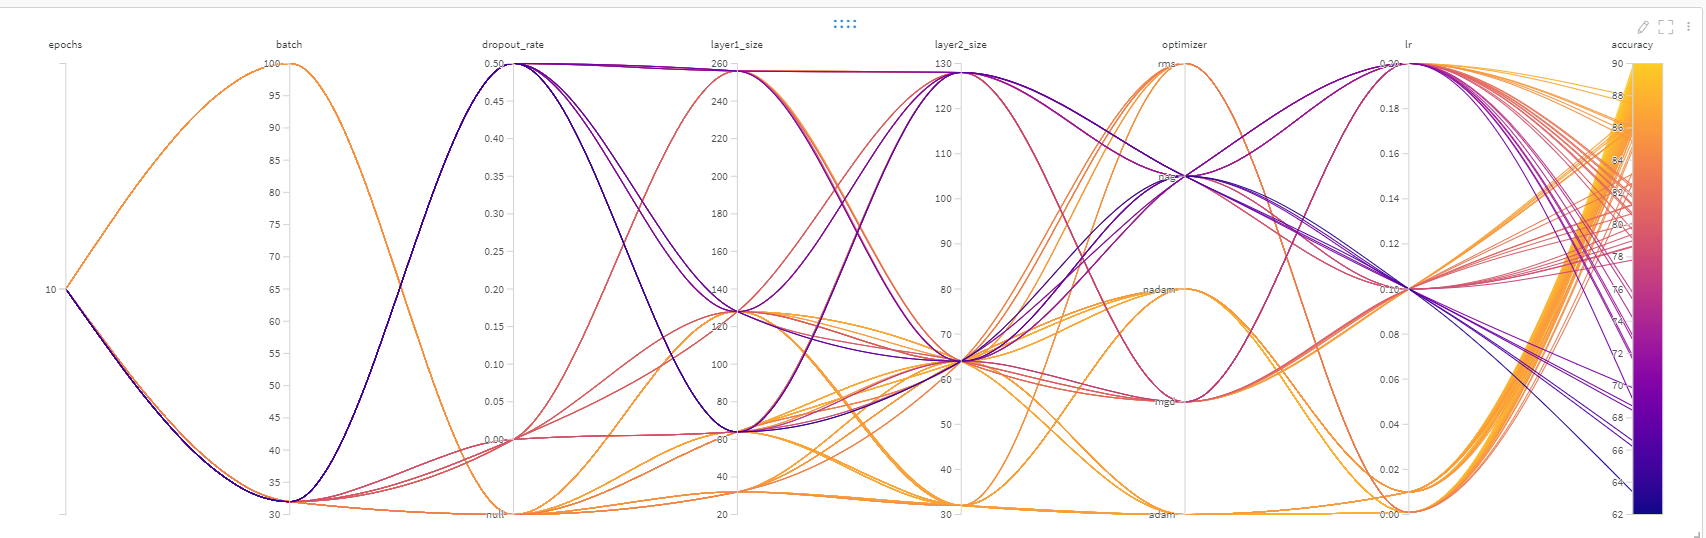

Accurecy
----

output:<br>
https://wandb.ai/kankan-jana/cs6910_assignment1/reports/Shared-panel-22-02-20-02-02-99--VmlldzoxNTg0MDE2

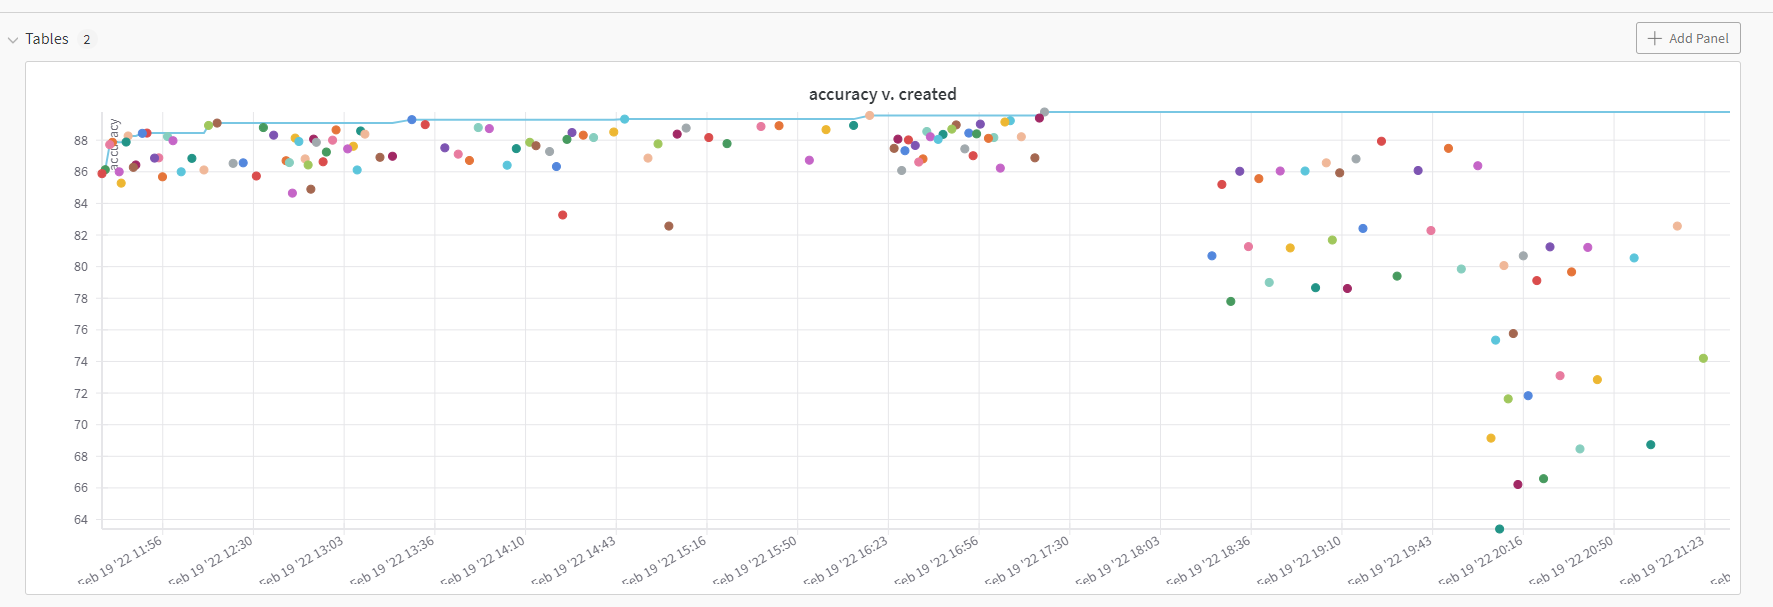

Code 
----


In [ ]:

import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
sys.path.append('../fashnMnist/')
from fashnMnist.FashnMnist import FashnMnist
from fashnMnist.Preprocessor import Preprocessor
import wandb

np.random.seed(20)

In [ ]:

from sklearn.model_selection import train_test_split    
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
preprocess=Preprocessor(normalization=True)
x_trainNorm, y_trainNorm, x_testNorm, y_testNorm=preprocess.Process_Fashon_mnistDataSet(x_train, y_train, x_test, y_test)
X_training, x_crossVal, y_training, y_crossval = train_test_split(x_trainNorm, y_trainNorm, test_size=0.1, random_state=20)
print(y_training.shape)
print(y_crossval.shape)

#Load Mnist fafashion dataset using keras

In [ ]:

sweep_config = {"name": "sweep", "method": "grid"}
sweep_config["metric"] = {"name": "accuracy", "goal": "maximize"}
"""
parameters_dict = {
                "epochs": {"values": [10]},     
                "optimizer": {"values": ["rms","adam","nadam"]}, \
                "batch": {"values": [32,100]}, \
                "lr":{"values":[0.01,0.001]}, \
                "layer1_size":{"values": [32,64,128]}, \
                "layer2_size":{"values": [32,64]}, \ 
                "activation" :{"values": ["tanh","relu"]} \ 
                }
                """
parameters_dict = {
                "epochs": {"values": [10]},     
                "optimizer": {"values": ["nag","mgd"]}, \
                "batch": {"values": [32]}, \
                "lr":{"values":[0.2,.1]}, \
                "layer1_size":{"values": [64,128,256]}, \
                "layer2_size":{"values": [64,128]} ,\
                "dropout_rate":{"values": [0,0.5]} ,\
                "activation" :{"values": ["tanh"]} 
                }
sweep_config["parameters"] = parameters_dict

In [ ]:

def train_model(config = sweep_config):
    with wandb.init(config = config):
        config = wandb.init().config
        
        #wandb.run.name = "op_{}_act_{}_lr_{}_layer1_{}_layer2_{}".format(config.optimizer,config.activation ,config.lr,config.layer1_size,config.layer2_size)
        
        wandb.run.name = "op_{}_lr_{}_layer1_{}_layer2_{}".format(config.optimizer ,config.lr,config.layer1_size,config.layer2_size)
        model=FashnMnist(x=X_training,y=y_training,  lr=config.lr,  epochs =config.epochs, batch=config.batch,                 
                   layer1_size=config.layer1_size,\
                   layer2_size=config.layer2_size,\
                   optimizer=config.optimizer,\
                   initializer="he",\
                   activation=config.activation,\
                   weight_decay=.5,\
                   dropout_rate=config.dropout_rate\
                   )
        
        """
        model=FashnMnist(x=X_training,y=y_training,  lr=config.lr,  epochs =config.epochs, batch=config.batch,                 
           layer1_size=config.layer1_size,\
           layer2_size=config.layer2_size,\
           optimizer=config.optimizer,\
           initializer="he",\
           activation=config.activation,\
           weight_decay=.5
           )
        """
        model.train()
        _,accTrain,lossTrain = model.GetRunResult(X_training,y_training)
        _,accTest,lossTest =model.GetRunResult(x_crossVal,y_crossval)
        
        metrics = {
            "Training Accurecy":accTrain,
            "Training Loss":lossTrain,
            "accuracy": accTest,
            "loss": lossTest}
        wandb.log(metrics)
      
 

    

In [ ]:

import os
os.environ['WANDB_NOTEBOOK_NAME'] = 'sweepTest'
sweep_id = wandb.sweep(sweep_config, project = "cs6910_assignment1")
wandb.agent(sweep_id, function = train_model)